In [1]:
%matplotlib inline
import sys
import os
DATA_PATH = os.getenv('DATA_PATH')
CODE_PATH = os.getenv('CODE_PATH')
FIGURE_PATH = os.getenv('FIGURE_PATH')

sys.path.insert(0, os.path.join(CODE_PATH))

import pandas as pd
import numpy as np
import json
import re

import time

from src.load import EGRID, BA_DATA

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from calendar import month_abbr

import logging.config
logging.config.fileConfig(os.path.join(CODE_PATH, "src/logging.conf"))
logger = logging.getLogger(__name__)
                           
COLORS = sns.color_palette('muted')
os.makedirs(os.path.join(FIGURE_PATH, "main"), exist_ok=True)
os.makedirs(os.path.join(FIGURE_PATH, "si"), exist_ok=True)

In [2]:
# import matplotlib
# matplotlib.font_manager._rebuild()

In [3]:
#plt.style.use('seaborn-paper')
plt.rcParams['figure.figsize'] = [6.99, 2.5]
plt.rcParams['grid.color'] = 'k'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.dpi"] = 300
plt.rcParams['font.size'] = 10

import cmocean
cmap = cmocean.cm.cmap_d['phase']

In [4]:
# Set font sizes
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# column sizes
cm_to_in = 0.393701
col_width3 = cm_to_in * 17.8
col_width2 = cm_to_in * 11.4
col_width1 = cm_to_in * 5.3

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=.5)  # fontsize of the figure title
plt.rc('xtick.minor', width=.5)  # fontsize of the figure title
plt.rc('xtick.major', width=.5)  # fontsize of the figure title
plt.rc('ytick.minor', width=.5)  # fontsize of the figure title
plt.rc('ytick.major', width=.5)  # fontsize of the figure title


In [5]:
co2 = BA_DATA(fileNm=os.path.join(DATA_PATH, "analysis/SEED_CO2_H.csv"), variable="CO2")
elec = BA_DATA(fileNm=os.path.join(DATA_PATH, "analysis/SEED_E_H.csv"), variable="E")
co2i = BA_DATA(fileNm=os.path.join(DATA_PATH, "analysis/SEED_EFs_CO2_H.csv"), variable="CO2i")

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [6]:
# P10/P50/P90 of production and consumption emissions

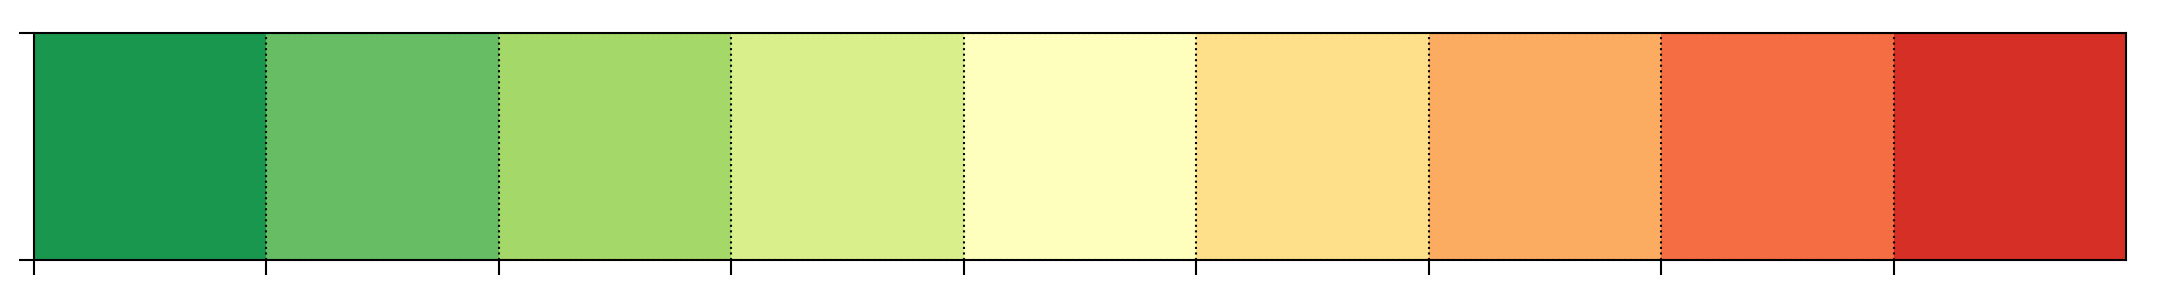

In [7]:
cmap = sns.color_palette("RdYlGn", 9)[-1::-1]
sns.palplot(cmap)

In [8]:
# Create colormap
cmap = sns.color_palette("RdYlGn", 9)[-1::-1]
thresh = [100, 200, 300, 400, 500, 600, 700, 900]
def get_color(n):
    # Searching for the position 
    index = len(thresh)
    for i in range(len(thresh)): 
        if thresh[i] > n: 
            index = i 
            break
    return cmap[index]
get_color(899)

(0.9568627450980393, 0.42745098039215684, 0.2627450980392157)

In [9]:
savePlots = True

In [10]:
acronyms = {
    "AZPS": "Arizona Pub. Service Co.",
    "BANC": "BA of Northern California",
    "BPAT": "Bonneville Power",
    "CISO": "California ISO",
    "CPLE": "Duke Energy Progress East",
    "DUK": "Duke Energy Carolinas",
    "EPE": "El Paso Electric Company",
    "ERCO": "Elec. Rel. Council Texas",
    "FPC": "Duke Energy Florida",
    "FPL": "Florida Power & Light",
    "IPCO": "Idaho Power Company",
    "ISNE": "New England ISO",
    "LDWP": "Los Angeles Department of Water and Power",
    "MISO": "Midcontinent ISO",
    "NEVP": "Nevada Power Co.",
    "NWMT": "NorthWestern Corp",
    "NYIS": "New York ISO",
    "OVEC": "Ohio Valley", #"Ohio Valley Electric Corporation",
    "PACE": "PacifiCorp East",
    "PGE": "Portland General Electric",
    "PJM": "PJM Interconnection",
    "PNM": "Pub. Service Co. New Mexico",
    "PSCO": "Pub. Service Co. Colorado",
    "PSEI": "Puget Sound Energy",
    "SEC": "Seminole Electric Cooperative",
    "SOCO": "Southern Co. Services",
    "SRP": "Salt River Project",
    "SWPP": "Southwest Power Pool",
    "TVA": "Tennessee Valley",
    "WACM": ""#"Western Area Power Administration"
}

In [11]:
import matplotlib
matplotlib.__version__

'3.0.0'

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


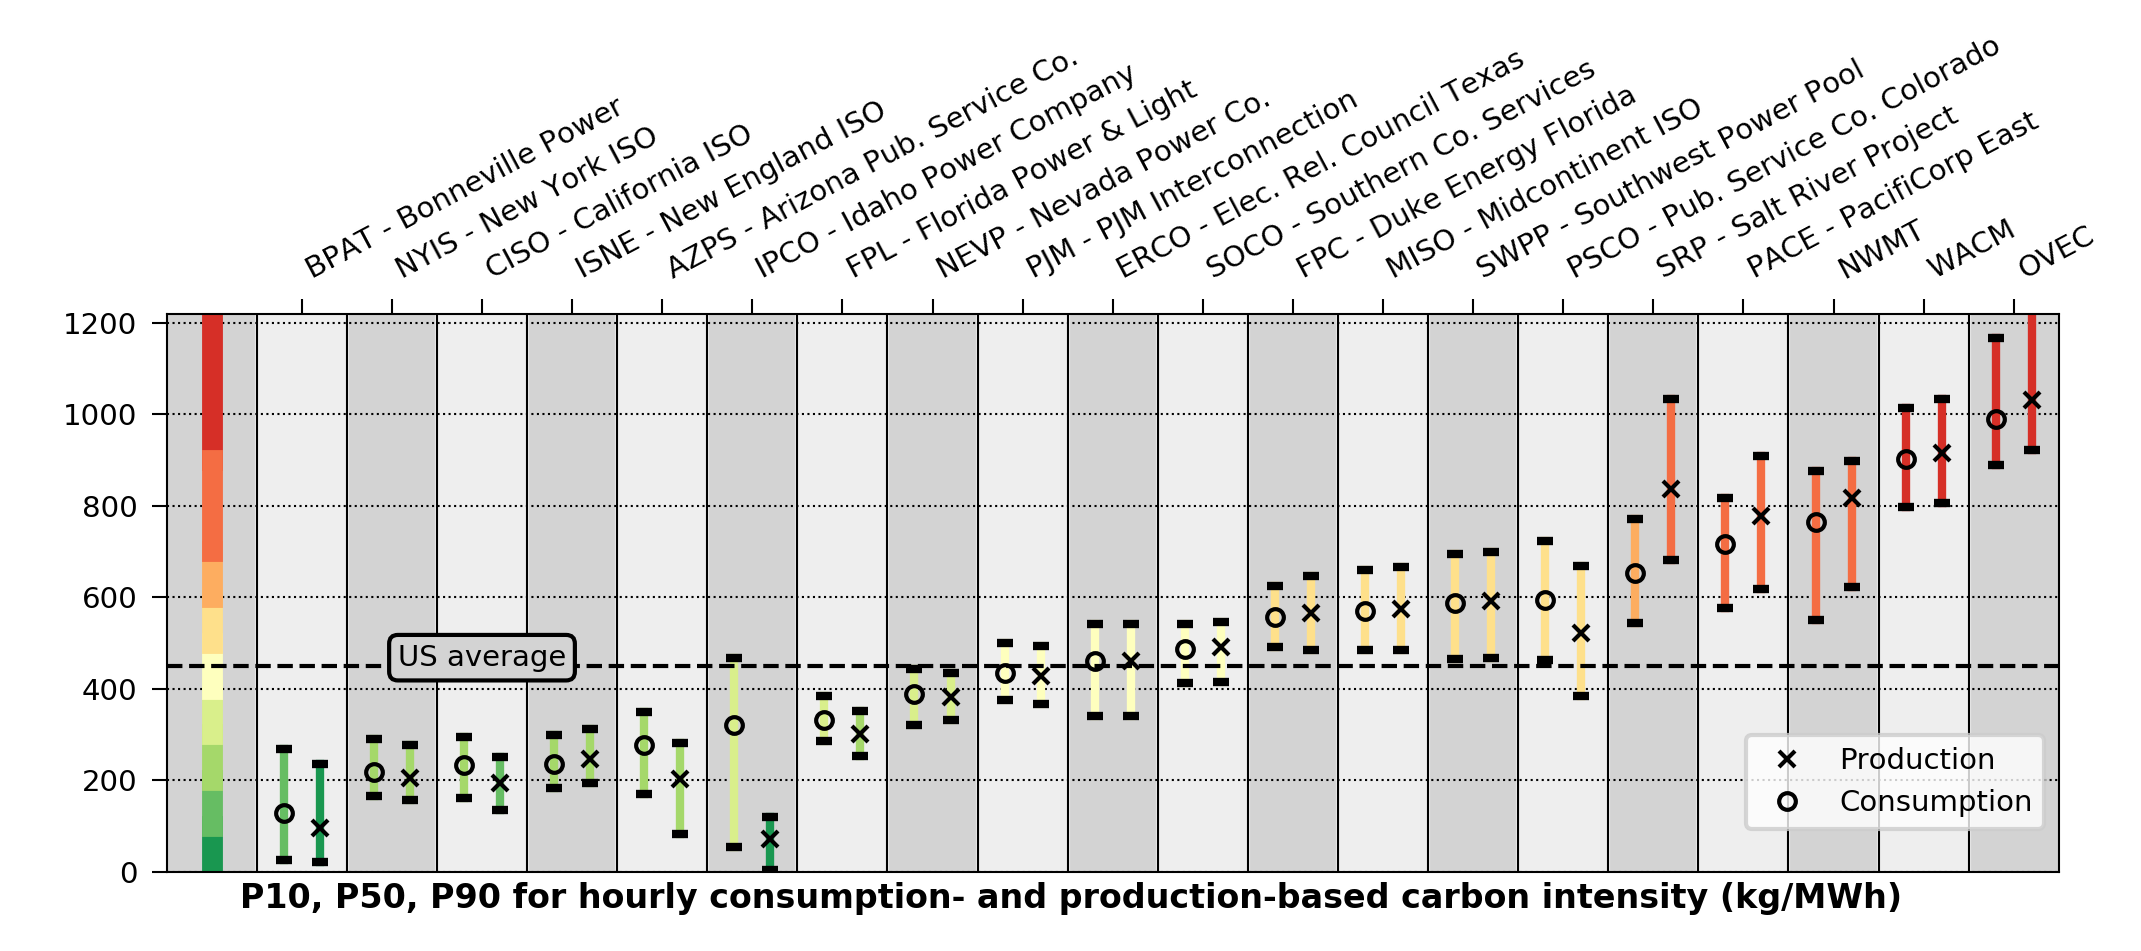

In [12]:
ba_list = ["CISO", "MISO", "PJM", "WACM", "BPAT", "SWPP",
          "FPC", "PSCO", "FPL", "IPCO", "EPE", "NYIS", "NEVP",
           "ISNE", "SRP", "OVEC", "SEC", "NWMT", "SOCO", "PACE",
          "ERCO", "TVA", "AZPS", "DUK", "CPLE", "PSEI"]

ba_list = ["CISO", "MISO", "PJM", "WACM", "BPAT", "SWPP",
          "FPC", "PSCO", "FPL", "IPCO", "NYIS", "NEVP",
           "ISNE", "SRP", "OVEC", "NWMT", "SOCO", "PACE",
          "ERCO", "AZPS"]

ba_list = [col.split("_")[1] for col in co2i.df.loc[
    :, co2i.get_cols(ba_list, field="D")].quantile(
        q=.5).sort_values().index]

#fig, ax1 = plt.subplots(figsize=(7., 5.))
fig, ax1 = plt.subplots(figsize=(col_width3, 3.))

ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_yticks([])
ax1.set_xticks([])
ax1.axis('off')

# width = 0.35
width = 0.90
height = 0.62
left1 = 0.07
bottom = 0.06
ax = fig.add_axes([left1, bottom, width, height])

bgcolor = "#D3D3D3"
color = "#eeeeee"
figcolor = "#A9A9A9"
# ax1.set_facecolor(figcolor)
#ax.set_facecolor()
ax.set_facecolor(bgcolor)


for iba, ba in enumerate(ba_list):
    q = co2i.df.loc[:, co2i.get_cols(ba, field="D")].quantile(q=[.1, .5, .9])
    q2 = co2i.df.loc[:, co2i.get_cols(ba, field="NG")].quantile(q=[.1, .5, .9])
    ax.plot([iba-.2, iba-.2], [q.values[0], q.values[2]],
            marker="_",ms=4,
            color=get_color(q.values[1]),
            mfc='none', mec='k', mew=2, lw=2,
            label='_nolegend_')
    ax.plot([iba-.2], [q.values[1]],
            marker="o",ms=4,
            mfc='none', mec='k', mew=1)
    ax.plot([iba+.2, iba+.2], [q2.values[0], q2.values[2]],
            marker="_",ms=4,
            color=get_color(q2.values[1]),
            mfc='k', mec='k', mew=2, lw=2,
            label='_nolegend_')
    ax.plot([iba+.2], [q2.values[1]],
            ls="--",
            marker="x",
            ms=4, lw=1,
            mec='k', mfc='k',
            color=get_color(q.values[1]),
            label='_nolegend_')
    if iba % 2 == 0:
            ax.axvspan(iba-.5, iba+.5, color=color)
    ax.axvline(iba-.5, lw=.5, color='k')

ax.set_ylim([-0,1220])
ax.set_xticks(range(len(ba_list)))
labels = ["%s - %s" % (ba, acronyms[ba]) for ba in ba_list[0:-3]] + ["%s" % ba for ba in ba_list[-3:]]
#labels[-1] = "WACM"
ax.set_xticklabels(labels,rotation=28, ha='left')
ax.xaxis.tick_top()

#ax.set_facecolor("#D3D3D3")





ax1.text(0.5, 0.015, "P10, P50, P90 for hourly consumption- and production-based carbon intensity (kg/MWh)",
         ha='center', transform=ax1.transAxes, fontsize=MEDIUM_SIZE, weight='bold')

ax.plot([-1, -1], [0, thresh[0]], color=get_color(0), lw=5,
       label='_nolegend_')
ax.plot([-1, -1], [thresh[-1], ax.get_ylim()[1]], lw=5,
        color=get_color(900), label='_nolegend_')
for i in range(len(thresh)-1):
    ax.plot([-1, -1], [thresh[i],thresh[i+1]], lw=5,
            color=get_color(thresh[i]), label='_nolegend_')
ax.set_xlim([-1.5, len(ba_list)-.5])

ax.plot([], [], label="Production",
            marker="x", ls="None",
            ms=4, mfc='none', mec='k', mew=1,)
ax.plot([], [], label="Consumption",
            marker="o", ls="None",
            ms=4, mfc='none', mec='k', mew=1)
ax.legend(loc='lower right', bbox_to_anchor=(1, 0.05))
ax.xaxis.grid(False)

ax.axhline(450, lw=1., color='k', ls='--')
props = dict(boxstyle='round', facecolor=bgcolor)
ax.text(2,450, 'US average', ha='center', bbox=props)

# ax.yaxis.tick_right()
plt.subplots_adjust(left=0.005, right=.995, top=.995, bottom=0.005)

if savePlots:
    fig.savefig(os.path.join(FIGURE_PATH, 'main/fig2.pdf'))
#     fig.savefig(os.path.join(FIGURE_PATH, 'main/fig2.png'))

In [13]:
print(len(ba_list))
for ba in ["MISO", "CISO", "SRP"]:
    print(co2i.df.loc[:, co2i.get_cols(ba, field="D")].quantile(q=[.1, .5, .9]))
    print(co2i.df.loc[:, co2i.get_cols(ba, field="NG")].quantile(q=[.1, .5, .9]))

20
     CO2i_MISO_D
0.1   483.294948
0.5   569.181160
0.9   658.873907
     CO2i_MISO_NG
0.1    484.957713
0.5    573.319528
0.9    666.706532
     CO2i_CISO_D
0.1   160.452525
0.5   232.781278
0.9   294.510130
     CO2i_CISO_NG
0.1    133.697338
0.5    193.937618
0.9    250.939275
     CO2i_SRP_D
0.1  544.115871
0.5  653.515002
0.9  770.047265
     CO2i_SRP_NG
0.1   680.896515
0.5   835.855538
0.9  1032.301675
